# Task 1.2: Feature Extraction \& Engineering

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Loading the new dataset

In [143]:
df = pd.read_csv('../dataset/new_customer_supermarket.csv', sep='\t', index_col=0)
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta,TotSale
0,539993,2011-04-01 10:00:00,1.95,13313.0,22386,JUMBO BAG PINK POLKADOT,10,19.5
1,539993,2011-04-01 10:00:00,0.42,13313.0,21499,BLUE POLKADOT WRAP,25,10.5
2,539993,2011-04-01 10:00:00,0.42,13313.0,21498,RED RETROSPOT WRAP,25,10.5
3,539993,2011-04-01 10:00:00,2.10,13313.0,22379,RECYCLING BAG RETROSPOT,5,10.5
4,539993,2011-04-01 10:00:00,1.25,13313.0,20718,RED RETROSPOT SHOPPER BAG,10,12.5
...,...,...,...,...,...,...,...,...
255536,581585,2011-09-12 12:31:00,0.95,15804.0,23145,ZINC TLIGHT HOLDER STAR LARGE,12,11.4
255537,581585,2011-09-12 12:31:00,1.95,15804.0,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,23.4
255538,581586,2011-09-12 12:49:00,2.95,13113.0,22061,LARGE CAKE STAND HANGING STRAWBERY,8,23.6
255539,581586,2011-09-12 12:49:00,1.25,13113.0,23275,SET OF HANGING OWLS OLLIE BEAK,24,30.0


In [144]:
df.dtypes

BasketID        int64
BasketDate     object
Sale          float64
CustomerID    float64
ProdID         object
ProdDescr      object
Qta             int64
TotSale       float64
dtype: object

In [145]:
df = df.astype({'BasketDate': 'datetime64',
                'BasketID': 'object',
                'CustomerID': 'object'})

## Feature Extraction

The total number of items purchased by a customer during the period of observation:

In [146]:
I = df.groupby('CustomerID', as_index=False)['Qta'].sum()
I.rename(columns={'Qta': 'I'}, inplace=True)
I

,CustomerID,I
0,12747.0,792
1,12748.0,13173
2,12749.0,1225
3,12820.0,674
4,12822.0,456
...,...,...
2510,18273.0,40
2511,18277.0,68
2512,18282.0,51
2513,18283.0,1351


The number of distinct items bought by a customer in the period of observation:

In [147]:
Iu = df.groupby('CustomerID')['ProdID'].nunique().reset_index()
Iu.rename(columns={'ProdID': 'Iu'}, inplace=True)
Iu

,CustomerID,Iu
0,12747.0,29
1,12748.0,1442
2,12749.0,120
3,12820.0,54
4,12822.0,37
...,...,...
2510,18273.0,1
2511,18277.0,8
2512,18282.0,8
2513,18283.0,258


The maximum number of items purchased by a customer during a shopping session:

In [148]:
Imax = df.groupby(['CustomerID', 'BasketID'], as_index=False)['Qta'].sum()[['CustomerID', 'Qta']].groupby('CustomerID', as_index=False)['Qta'].max()
Imax.rename(columns={'Qta': 'Imax'}, inplace=True)
Imax

,CustomerID,Imax
0,12747.0,140
1,12748.0,1222
2,12749.0,626
3,12820.0,244
4,12822.0,370
...,...,...
2510,18273.0,20
2511,18277.0,68
2512,18282.0,26
2513,18283.0,241


The Shannon entropy on the purchasing behaviour of the customer:

In [149]:
from scipy.stats import entropy

In [150]:
pd.DataFrame(df.groupby('CustomerID')['TotSale'].apply(lambda x : x.value_counts()))

TotSale
CustomerID               
12747.0    20.80       11
           27.04        7
           19.80        6
           35.40        5
           61.20        4
...                   ...
18287.0    12.60        1
           17.70        1
           25.00        1
           17.00        1
           30.60        1

[82624 rows x 1 columns]

In [151]:
E = df.groupby('CustomerID')['TotSale'].apply(lambda x : entropy(x.value_counts(), base=2)).reset_index()
E.rename(columns={'TotSale': 'E'}, inplace=True)
E

,CustomerID,E
0,12747.0,4.171069
1,12748.0,6.509019
2,12749.0,4.530192
3,12820.0,3.929013
4,12822.0,4.010740
...,...,...
2510,18273.0,0.000000
2511,18277.0,2.750000
2512,18282.0,2.750000
2513,18283.0,4.954834


In [152]:
features = I.join(Iu.set_index('CustomerID'), on='CustomerID').join(
                Imax.set_index('CustomerID'), on='CustomerID').join(
                E.set_index('CustomerID'), on='CustomerID').set_index('CustomerID')
features

,I,Iu,Imax,E
CustomerID,,,,
12747.0,792,29,140,4.171069
12748.0,13173,1442,1222,6.509019
12749.0,1225,120,626,4.530192
12820.0,674,54,244,3.929013
12822.0,456,37,370,4.010740
...,...,...,...,...
18273.0,40,1,20,0.000000
18277.0,68,8,68,2.750000
18282.0,51,8,26,2.750000


### RFM Analysis

RFM (***Recency***, ***Frequency***, ***Monetary***) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- ***Frequency*** represents the number of repeat purchases the customer has made. This means that it’s one less than the total number of purchases. This is actually slightly wrong. It’s the count of time periods the customer had a purchase in. So if using days as units, then it’s the count of days the customer had a purchase on;
- ***T*** represents the age of the customer in whatever time units chosen (weekly, in the above dataset). This is equal to the duration between a customer’s first purchase and the end of the period under study;
- ***Recency*** represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase (thus if they have made only 1 purchase, the recency is 0);
- ***Monetary*** represents the average value of a given customer’s purchases. This is equal to the sum of all a customer’s purchases divided by the total number of purchases. Note that the denominator here is different than the frequency described above.

We will create those 3 customer attributes for each customer.

In [153]:
from lifetimes.utils import summary_data_from_transaction_data

In [154]:
rfm = summary_data_from_transaction_data(df, 'CustomerID', 'BasketDate', monetary_value_col='TotSale')
rfm.rename(columns={'frequency': 'Frequency',
                    'recency': 'Recency',
                    'monetary_value': 'Monetary'}, inplace=True)
rfm

,Frequency,Recency,T,Monetary
CustomerID,,,,
12747.0,8.0,318.0,341.0,236.845000
12748.0,95.0,335.0,340.0,186.703895
12749.0,3.0,313.0,336.0,522.850000
12820.0,3.0,282.0,327.0,251.053333
12822.0,1.0,17.0,88.0,155.980000
...,...,...,...,...
18273.0,1.0,107.0,258.0,51.000000
18277.0,0.0,0.0,0.0,0.000000
18282.0,1.0,85.0,301.0,60.790000


In [155]:
one_time_buyers = round(sum(rfm['Frequency'] == 0) / float(len(rfm)) * (100), 2)
print('Percentage of customers purchase the item only once:', one_time_buyers, '%')

Percentage of customers purchase the item only once: 9.46 %


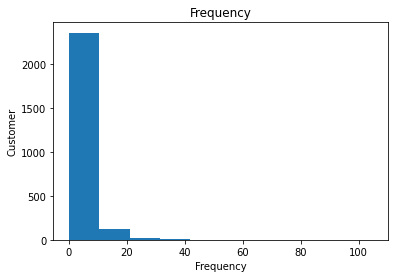

In [156]:
plt.hist(rfm['Frequency'])
plt.title('Frequency')
plt.ylabel('Customer' )
plt.xlabel('Frequency');

In [157]:
rfm = rfm[rfm['Frequency'] > 0]
rfm

,Frequency,Recency,T,Monetary
CustomerID,,,,
12747.0,8.0,318.0,341.0,236.845000
12748.0,95.0,335.0,340.0,186.703895
12749.0,3.0,313.0,336.0,522.850000
12820.0,3.0,282.0,327.0,251.053333
12822.0,1.0,17.0,88.0,155.980000
...,...,...,...,...
18272.0,5.0,223.0,226.0,494.592000
18273.0,1.0,107.0,258.0,51.000000
18282.0,1.0,85.0,301.0,60.790000


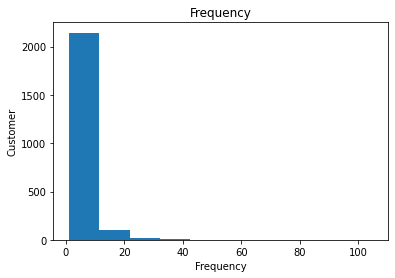

In [158]:
plt.hist(rfm['Frequency'])
plt.title('Frequency')
plt.ylabel('Customer' )
plt.xlabel('Frequency');

Now we change the distribution of monetary value with a histogram:

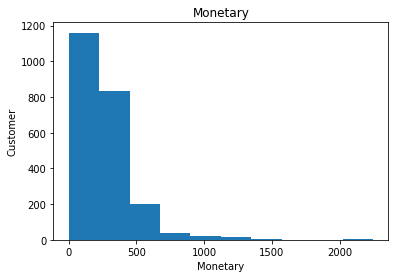

In [159]:
plt.hist(rfm['Monetary'])
plt.title('Monetary')
plt.ylabel('Customer', )
plt.xlabel('Monetary');

In [160]:
customer_profile = rfm.join(features, on='CustomerID')
customer_profile

,Frequency,Recency,T,Monetary,I,Iu,Imax,E
CustomerID,,,,,,,,
12747.0,8.0,318.0,341.0,236.845000,792,29,140,4.171069
12748.0,95.0,335.0,340.0,186.703895,13173,1442,1222,6.509019
12749.0,3.0,313.0,336.0,522.850000,1225,120,626,4.530192
12820.0,3.0,282.0,327.0,251.053333,674,54,244,3.929013
12822.0,1.0,17.0,88.0,155.980000,456,37,370,4.010740
...,...,...,...,...,...,...,...,...
18272.0,5.0,223.0,226.0,494.592000,1584,88,352,4.615483
18273.0,1.0,107.0,258.0,51.000000,40,1,20,0.000000
18282.0,1.0,85.0,301.0,60.790000,51,8,26,2.750000


### RFM Score

Calculating the individual RFM Score can be done in several ways, you can calculate it using your own business calculation formula that roughly matches your customer base. This time we will use the quartil statistical method, i.e. dividing Score into four parts:

In [161]:
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles

,Frequency,Recency,T,Monetary
0.25,1.0,113.0,202.0,138.10
0.50,2.0,198.0,274.0,220.74
0.75,5.0,276.0,318.0,330.25


In [162]:
# Arguments (x=value, p=recency, monetary, frequency, d=quartiles)
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

# Arguments (x=value, p=recency, monetary, frequency, k=quartiles)
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [163]:
# create RFM segmentation table
rfm['R'] = rfm['Recency'].apply(RScore, args=('Recency', quantiles,))
rfm['F'] = rfm['Frequency'].apply(FMScore, args=('Frequency', quantiles,))
rfm['M'] = rfm['Monetary'].apply(FMScore, args=('Monetary', quantiles,))
rfm

,Frequency,Recency,T,Monetary,R,F,M
CustomerID,,,,,,,
12747.0,8.0,318.0,341.0,236.845000,1,4,3
12748.0,95.0,335.0,340.0,186.703895,1,4,2
12749.0,3.0,313.0,336.0,522.850000,1,3,4
12820.0,3.0,282.0,327.0,251.053333,1,3,3
12822.0,1.0,17.0,88.0,155.980000,4,1,2
...,...,...,...,...,...,...,...
18272.0,5.0,223.0,226.0,494.592000,2,3,4
18273.0,1.0,107.0,258.0,51.000000,4,1,1
18282.0,1.0,85.0,301.0,60.790000,4,1,1


After the individual scores have been obtained, it is time to calculate the overall RFM score:

In [164]:
rfm['RFMScore'] = rfm[['R', 'F', 'M']].sum(axis=1)
rfm

,Frequency,Recency,T,Monetary,R,F,M,RFMScore
CustomerID,,,,,,,,
12747.0,8.0,318.0,341.0,236.845000,1,4,3,8
12748.0,95.0,335.0,340.0,186.703895,1,4,2,7
12749.0,3.0,313.0,336.0,522.850000,1,3,4,8
12820.0,3.0,282.0,327.0,251.053333,1,3,3,7
12822.0,1.0,17.0,88.0,155.980000,4,1,2,7
...,...,...,...,...,...,...,...,...
18272.0,5.0,223.0,226.0,494.592000,2,3,4,9
18273.0,1.0,107.0,258.0,51.000000,4,1,1,6
18282.0,1.0,85.0,301.0,60.790000,4,1,1,6


## Feature Engineering

In [165]:
customer_profile.corr()

,Frequency,Recency,T,Monetary,I,Iu,Imax,E
Frequency,1.000000,0.446513,0.323519,0.017415,0.695250,0.603315,0.174584,0.320746
Recency,0.446513,1.000000,0.753762,0.081380,0.351062,0.324054,0.153055,0.326864
T,0.323519,0.753762,1.000000,0.042323,0.240139,0.214343,0.072836,0.199464
Monetary,0.017415,0.081380,0.042323,1.000000,0.465381,0.375474,0.765753,0.338381
I,0.695250,0.351062,0.240139,0.465381,1.000000,0.754396,0.647265,0.394699
Iu,0.603315,0.324054,0.214343,0.375474,0.754396,1.000000,0.560092,0.639640
Imax,0.174584,0.153055,0.072836,0.765753,0.647265,0.560092,1.000000,0.420079
E,0.320746,0.326864,0.199464,0.338381,0.394699,0.639640,0.420079,1.000000


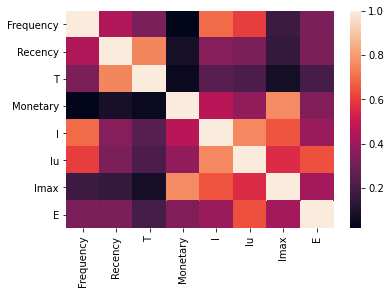

In [166]:
sns.heatmap(customer_profile.corr());

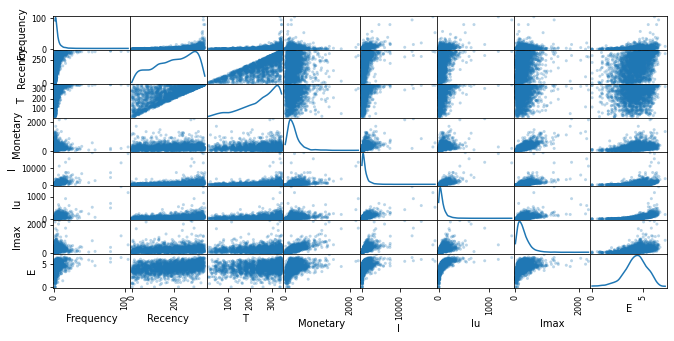

In [167]:
# produce a scatter matrix for each pair of features in the data
scatter_matrix(customer_profile, alpha=0.3, figsize=(11,5), diagonal='kde');

We can notice that we have a skewed distribution of the variables and there exist outliers.

This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

In [174]:
log_customer_profile = pd.DataFrame({'I': np.log(customer_profile['I']),
                                     'Iu': np.log(customer_profile['Iu']),
                                     'Imax': np.log(customer_profile ['Imax']),
                                     'E': np.log(customer_profile['E'] + 0.1), # can't take log(0) and so add a small number
                                     'Monetary': np.log(customer_profile['Monetary']),
                                     'Recency': np.log(customer_profile['Recency']),
                                     'T': np.log(customer_profile ['T']),
                                     'Frequency': np.log(customer_profile['Frequency'])})
log_customer_profile

,I,Iu,Imax,E,Monetary,Recency,T,Frequency
CustomerID,,,,,,,,
12747.0,6.674561,3.367296,4.941642,1.451864,5.467406,5.762051,5.831882,2.079442
12748.0,9.485925,7.273786,7.108244,1.888435,5.229524,5.814131,5.828946,4.553877
12749.0,7.110696,4.787492,6.439350,1.532598,6.259295,5.746203,5.817111,1.098612
12820.0,6.513230,3.988984,5.497168,1.393521,5.525665,5.641907,5.789960,1.098612
12822.0,6.122493,3.610918,5.913503,1.413603,5.049728,2.833213,4.477337,0.000000
...,...,...,...,...,...,...,...,...
18272.0,7.367709,4.477337,5.863631,1.550851,6.203733,5.407172,5.420535,1.609438
18273.0,3.688879,0.000000,2.995732,-2.302585,3.931826,4.672829,5.552960,0.000000
18282.0,3.931826,2.079442,3.258097,1.047319,4.107425,4.442651,5.707110,0.000000


In [175]:
log_customer_profile.corr()

,I,Iu,Imax,E,Monetary,Recency,T,Frequency
I,1.000000,0.805068,0.861508,0.583175,0.690365,0.389182,0.256790,0.679306
Iu,0.805068,1.000000,0.719732,0.798430,0.572142,0.320398,0.209340,0.514560
Imax,0.861508,0.719732,1.000000,0.533877,0.762175,0.182016,0.089314,0.281986
E,0.583175,0.798430,0.533877,1.000000,0.428938,0.266371,0.150111,0.372356
Monetary,0.690365,0.572142,0.762175,0.428938,1.000000,0.152233,0.091844,0.149590
Recency,0.389182,0.320398,0.182016,0.266371,0.152233,1.000000,0.676159,0.552252
T,0.256790,0.209340,0.089314,0.150111,0.091844,0.676159,1.000000,0.409257
Frequency,0.679306,0.514560,0.281986,0.372356,0.149590,0.552252,0.409257,1.000000


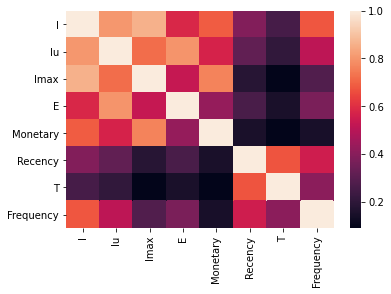

In [176]:
sns.heatmap(log_customer_profile.corr());

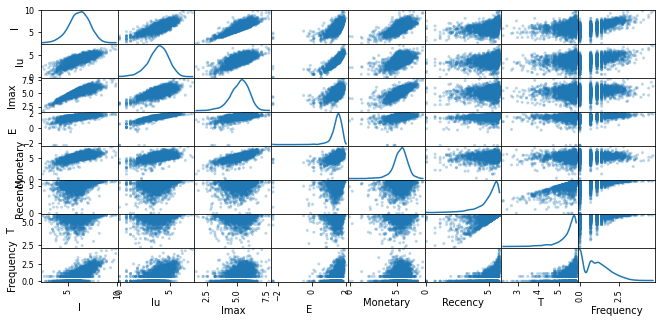

In [177]:
# produce a scatter matrix for each pair of features in the data
scatter_matrix(log_customer_profile, alpha=0.3, figsize=(11,5), diagonal='kde');

## Saving the Customer Profile model

In [178]:
log_customer_profile.to_csv('../dataset/customer_profile_model.csv', sep='\t')